In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./healthcare-dataset-stroke-data.csv',sep = ',',header = 0) 

In [3]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
# Dataframe with all columns I'm looking at
df = data[['gender', 'age', 'stroke']].copy()
df

,gender,age,stroke
0,Male,67.0,1
1,Female,61.0,1
2,Male,80.0,1
3,Female,49.0,1
4,Female,79.0,1
...,...,...,...
5105,Female,80.0,0
5106,Female,81.0,0
5107,Female,35.0,0
5108,Male,51.0,0


In [40]:
#Check for null values
df.isnull().values.any()

False

# Univariate Analysis: Gender

In [6]:
fem_ct = df.gender.value_counts().Female
men_ct = df.gender.value_counts().Male

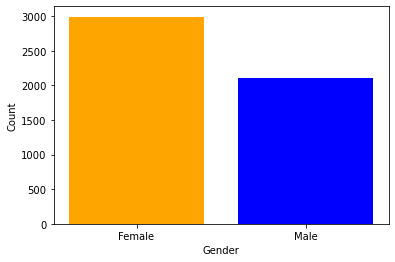

In [7]:
x = ['Female', 'Male']
y = [fem_ct, men_ct]
c = ['orange', 'blue']
plt.bar(x, height = y, color = c)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [8]:
print(fem_ct)
print(men_ct)

2994
2115


In [9]:
2994-2115

879

In [10]:
# 879 more Women included in dataset than men

# Univariate analysis: Age

In [41]:
df.describe()

,age,stroke
count,5062.000000,5062.000000
mean,43.624062,0.049190
std,22.346261,0.216286
min,1.000000,0.000000
25%,26.000000,0.000000
50%,45.000000,0.000000
75%,61.000000,0.000000
max,82.000000,1.000000


In [12]:
# Clean up age column, get rid of outliers
for index, row in df.iterrows():
    if row['age'] <= 1.00:
        df.drop(index, inplace=True)
df

,gender,age,stroke
0,Male,67.0,1
1,Female,61.0,1
2,Male,80.0,1
3,Female,49.0,1
4,Female,79.0,1
...,...,...,...
5105,Female,80.0,0
5106,Female,81.0,0
5107,Female,35.0,0
5108,Male,51.0,0


In [13]:
# Turn age dtype to int
df = df.astype({'age': 'int64'})
df['age']

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5062, dtype: int64

In [16]:
age_ct_df = pd.DataFrame(df['age'].value_counts())
age_ct_df = age_ct_df.rename(columns={'age': 'count'})
age_ct_df

,count
78,102
57,95
52,90
54,87
51,86
...,...
11,36
10,35
4,34
7,32


Text(0, 0.5, 'Count')

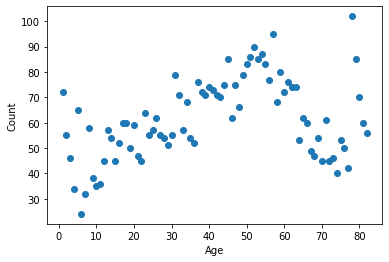

In [17]:
plt.scatter(age_ct_df.index, age_ct_df['count'])
plt.xlabel('Age')
plt.ylabel('Count')

# Bivariate analysis: Gender vs. Stroke

In [19]:
gen_stroke = data[['gender', 'stroke']].copy()
gen_stroke

,gender,stroke
0,Male,1
1,Female,1
2,Male,1
3,Female,1
4,Female,1
...,...,...
5105,Female,0
5106,Female,0
5107,Female,0
5108,Male,0


In [20]:
stroke = gen_stroke.loc[gen_stroke['stroke'] == 1]
no_stroke = gen_stroke.loc[gen_stroke['stroke'] == 0]

In [21]:
stroke_men = stroke.gender.value_counts().Male
stroke_fem = stroke.gender.value_counts().Female
no_stroke_men = no_stroke.gender.value_counts().Male
no_stroke_fem = no_stroke.gender.value_counts().Female

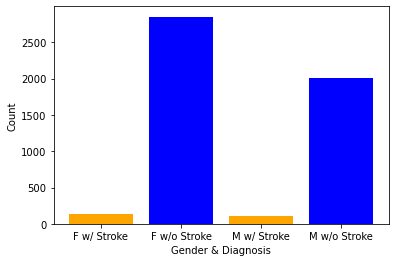

In [22]:
x = ['F w/ Stroke', 'F w/o Stroke','M w/ Stroke', 'M w/o Stroke']
y = [stroke_fem, no_stroke_fem, stroke_men, no_stroke_men]
c = ['orange', 'blue', 'orange', 'blue']
fig = plt.bar(x, height = y, color = c)
plt.xlabel('Gender & Diagnosis')
plt.ylabel('Count')
plt.show()

# Bivariate analysis: Age vs. Stroke

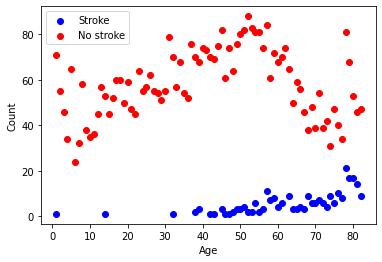

In [45]:
stroke = df.loc[df['stroke'] == 1]
no_stroke = df.loc[df['stroke'] == 0]

stroke_age = pd.DataFrame(stroke.age.value_counts())
stroke_age = stroke_age.rename(columns={'age': 'count'})
no_stroke_age = pd.DataFrame(no_stroke.age.value_counts())
no_stroke_age = no_stroke_age.rename(columns={'age': 'count'})

plt.scatter(stroke_age.index, stroke_age['count'], color = 'blue')

plt.scatter(no_stroke_age.index, no_stroke_age['count'], color = 'red')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Stroke', 'No stroke'])
plt.show()

# Mulitvariate analysis: Gender vs. Age vs. Stroke

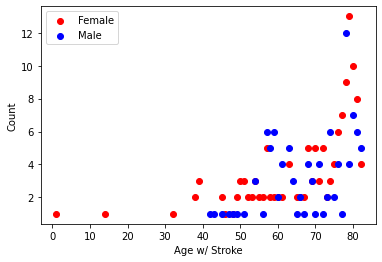

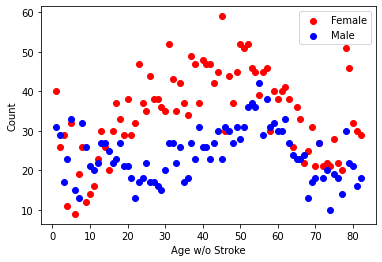

In [39]:
fem_stroke = stroke.loc[stroke['gender'] == 'Female']
fem_no_stroke = no_stroke.loc[no_stroke['gender'] == 'Female']
men_stroke = stroke.loc[stroke['gender'] == 'Male']
men_no_stroke = no_stroke.loc[no_stroke['gender'] == 'Male']

fem_stroke
#Plot those w/ Stroke
fem_stroke_ct = pd.DataFrame(fem_stroke['age'].value_counts())
fem_stroke_ct = fem_stroke_ct.rename(columns={'age': 'count'})
plt.scatter(fem_stroke_ct.index, fem_stroke_ct['count'], c='red')
men_stroke_ct = pd.DataFrame(men_stroke['age'].value_counts())
men_stroke_ct = men_stroke_ct.rename(columns={'age': 'count'})
plt.scatter(men_stroke_ct.index, men_stroke_ct['count'], c='blue')
plt.xlabel('Age w/ Stroke')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()

#Plot those w/o Stroke
fem_no_stroke_ct = pd.DataFrame(fem_no_stroke['age'].value_counts())
fem_no_stroke_ct = fem_no_stroke_ct.rename(columns={'age': 'count'})
plt.scatter(fem_no_stroke_ct.index, fem_no_stroke_ct['count'], c='red')
men_no_stroke_ct = pd.DataFrame(men_no_stroke['age'].value_counts())
men_no_stroke_ct = men_no_stroke_ct.rename(columns={'age': 'count'})
plt.scatter(men_no_stroke_ct.index, men_no_stroke_ct['count'], c='blue')
plt.xlabel('Age w/o Stroke')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()